
# EXPLORATORY DATA ANALYSIS ON A DATASET


Tasks:
1.	Data Cleaning and Preparation:

●	Load the dataset into a data frame or equivalent data structure.

●	Handle missing values appropriately (e.g., imputation, deletion).

●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

●	Detect and treat outliers if necessary.

2.	Statistical Summary:

●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

●	Highlight any interesting findings from this summary.

3.	Data Visualization:

●	Create histograms or boxplots to visualize the distributions of various numerical variables.

●	Use bar charts or pie charts to display the frequency of categories for categorical variables.

●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

4.	Pattern Recognition and Insights:

●	Identify any correlations between variables and discuss their potential implications.

●	Look for trends or patterns over time if temporal data is available.

5.	Conclusion:

●	Summarize the key insights and patterns discovered through your exploratory analysis.

●	Discuss how these findings could impact decision-making or further analyses.


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/Cardiotocographic (1).csv")
print(df.head())

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [5]:
df.fillna(df.mean(), inplace=True)


In [6]:
print(df.isnull().sum())

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [7]:
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

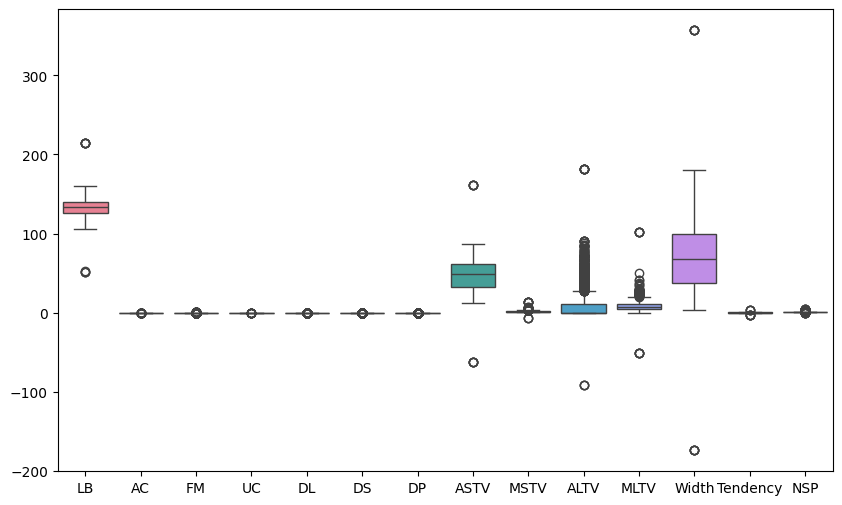

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show

In [27]:
for col in df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers removed. Data shape:", df.shape)

Outliers removed. Data shape: (416, 14)


<function matplotlib.pyplot.show(close=None, block=None)>

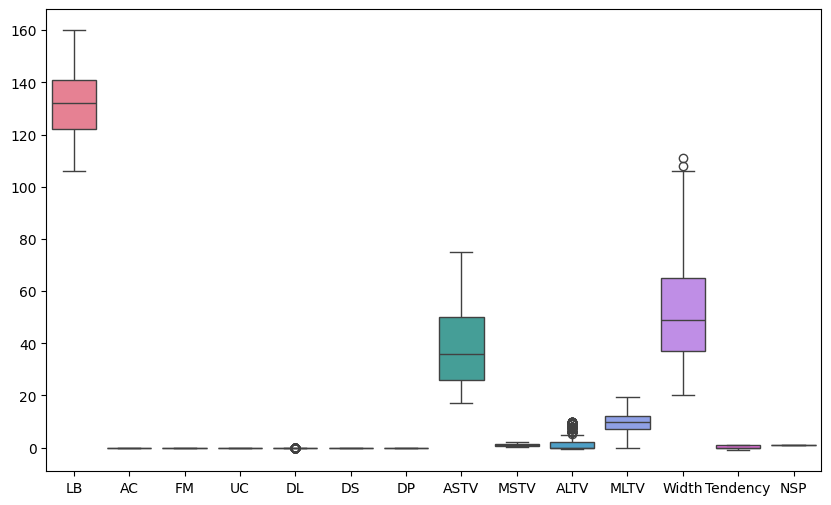

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show

In [13]:
mean = df.mean()
median = df.median()
std_dev = df.std()
summary_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Standard Deviation': std_dev
    }).round(3)

In [14]:
summary_df

,Mean,Median,Standard Deviation
LB,132.226,133.000,9.430
AC,0.004,0.003,0.004
FM,0.001,0.000,0.001
UC,0.005,0.005,0.003
DL,0.002,0.000,0.002
DS,0.000,0.000,0.000
DP,0.000,0.000,0.000
ASTV,42.964,42.000,15.144
MSTV,1.217,1.200,0.501
ALTV,4.628,0.000,8.737


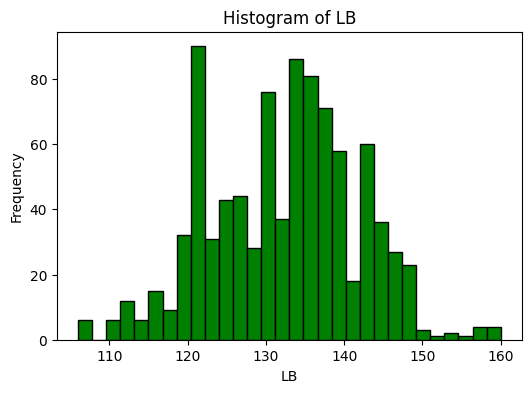

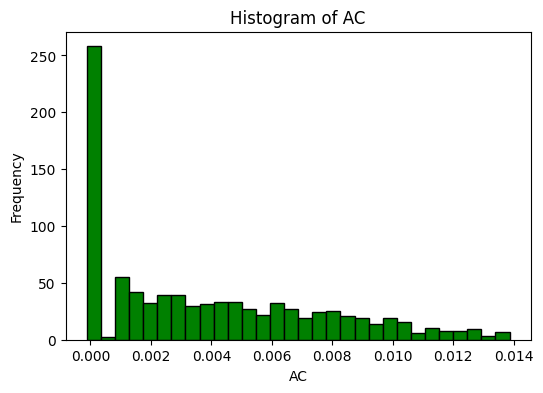

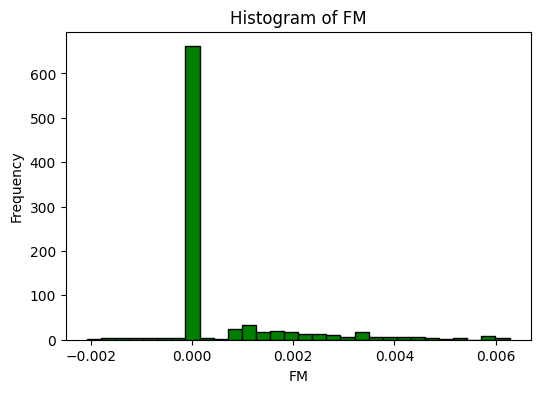

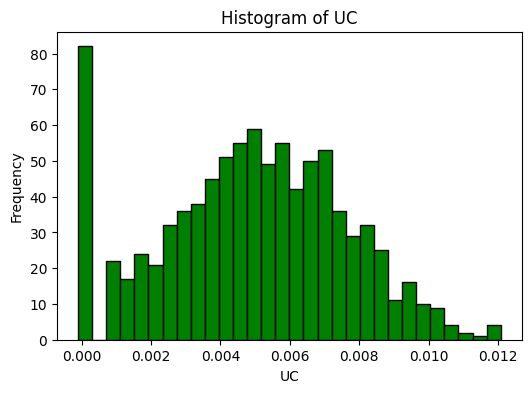

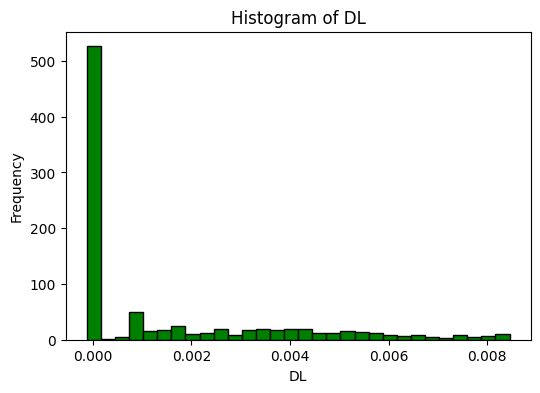

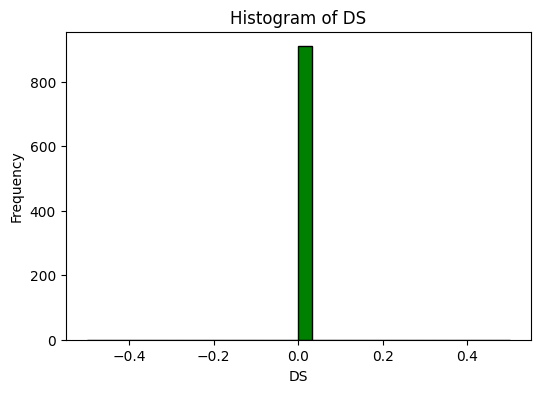

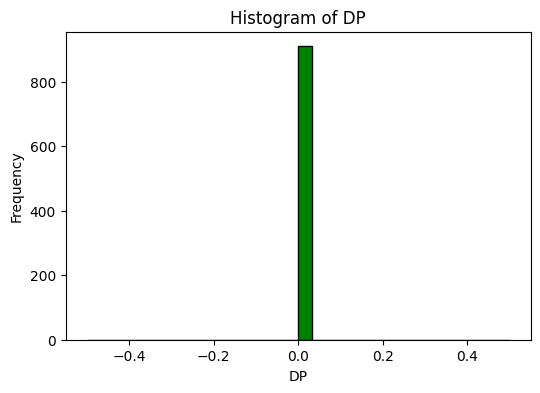

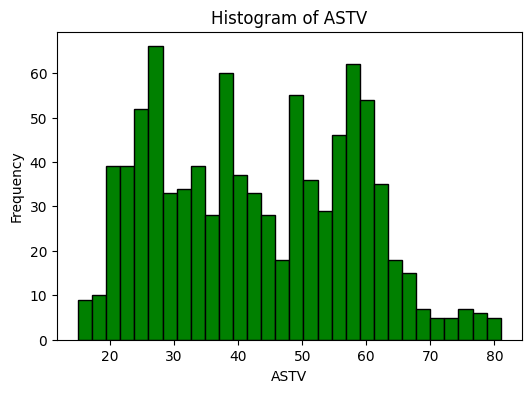

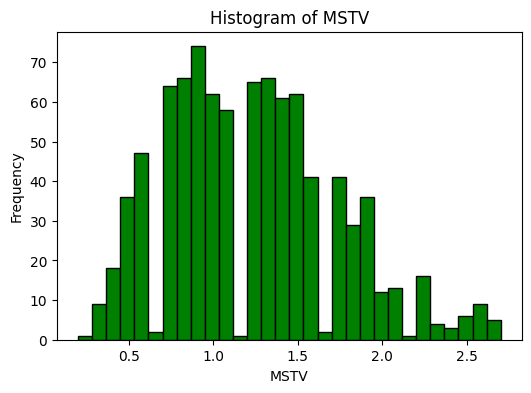

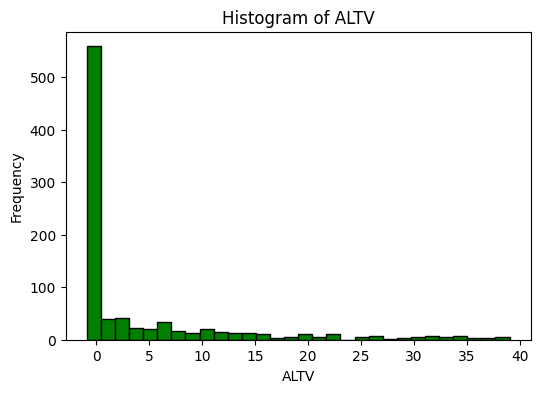

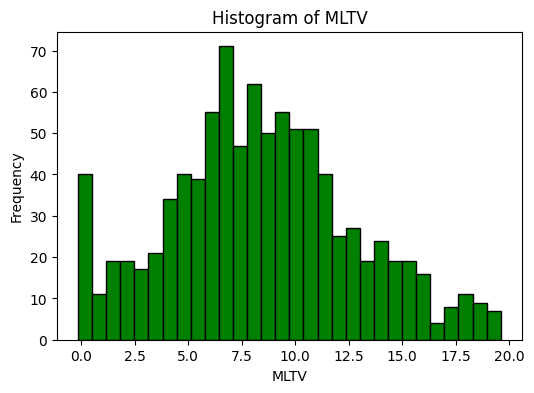

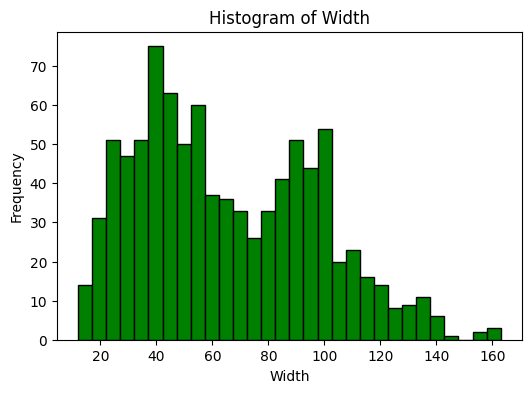

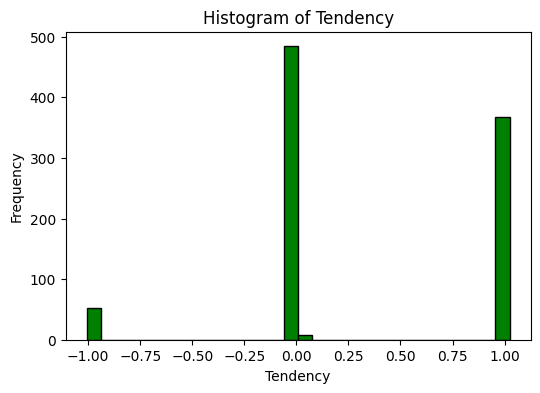

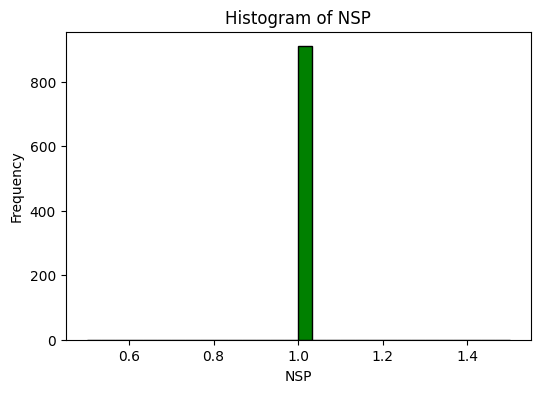

In [21]:
for col in df:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30, color='green', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

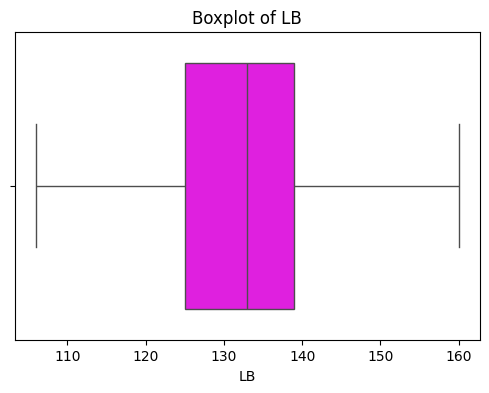

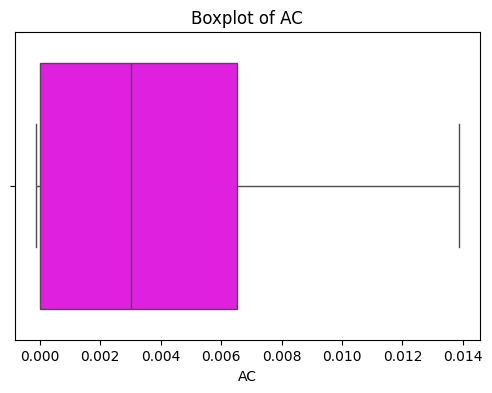

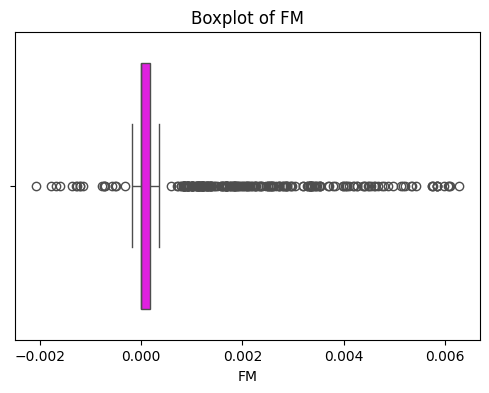

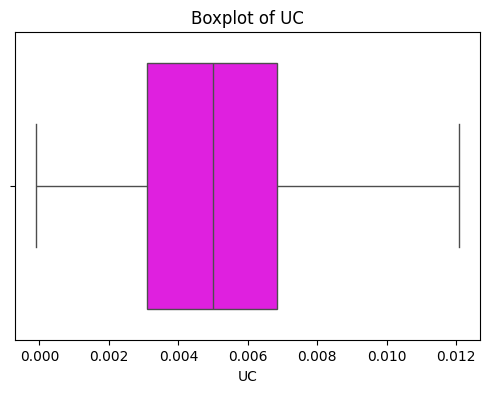

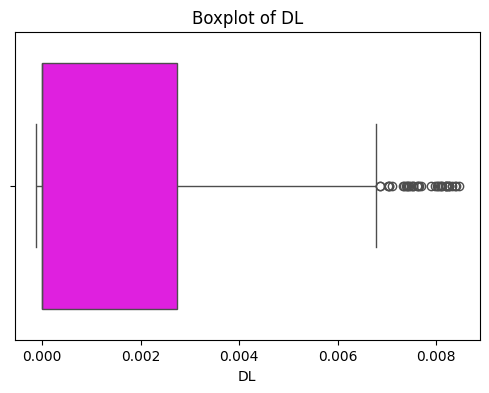

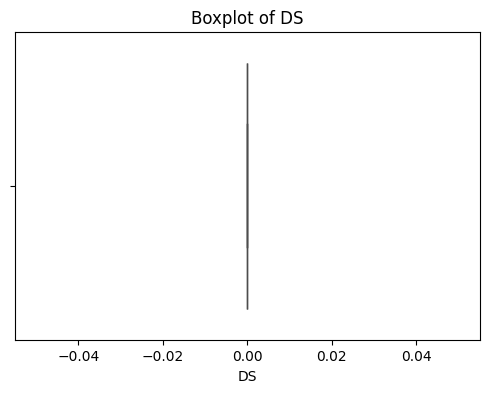

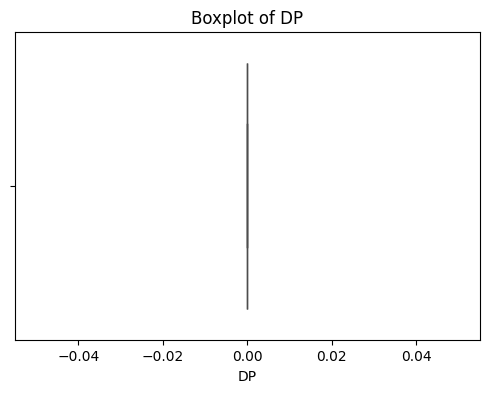

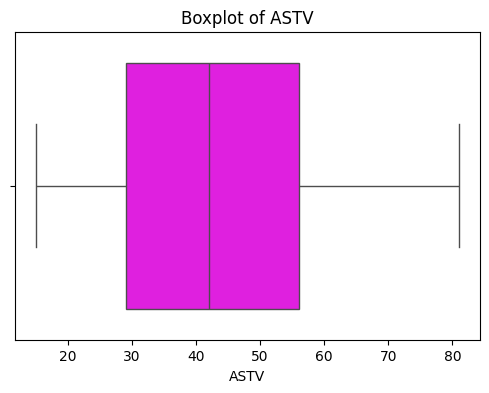

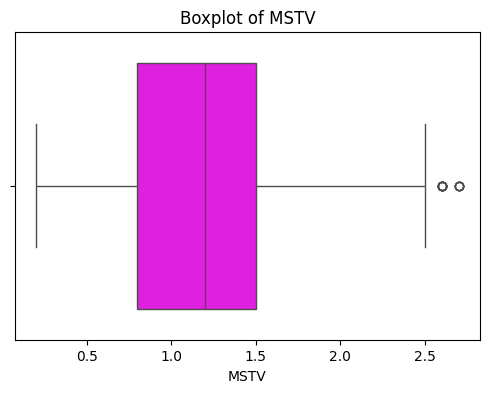

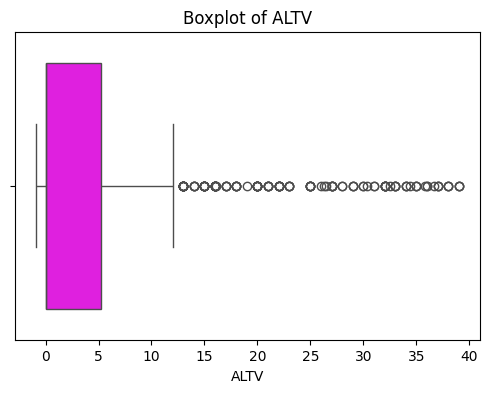

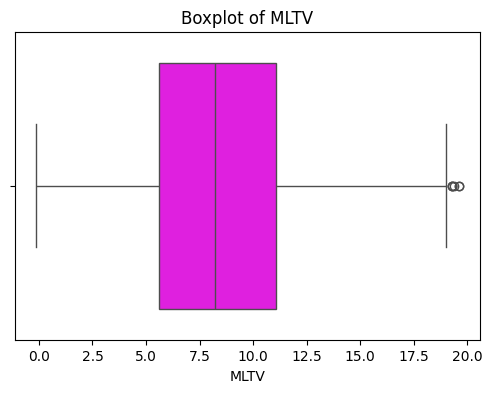

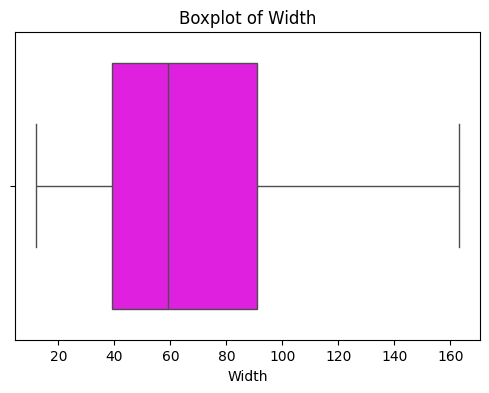

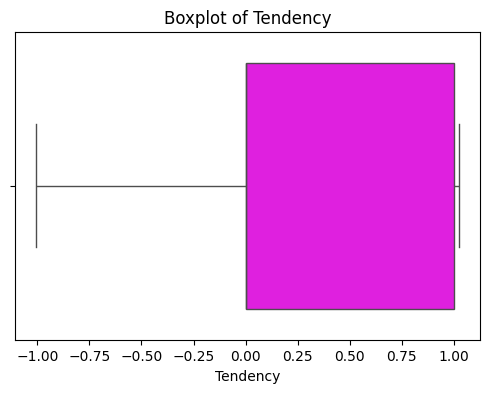

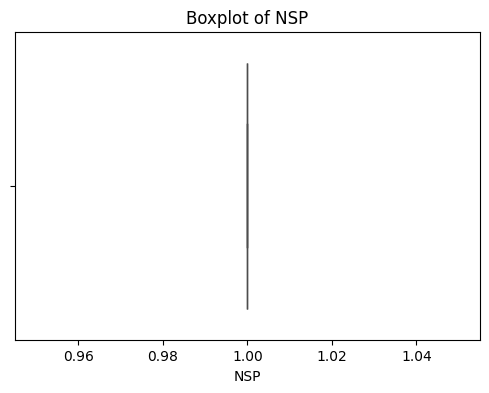

In [20]:
for col in df:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='magenta')
    plt.title(f'Boxplot of {col}')
    plt.show()

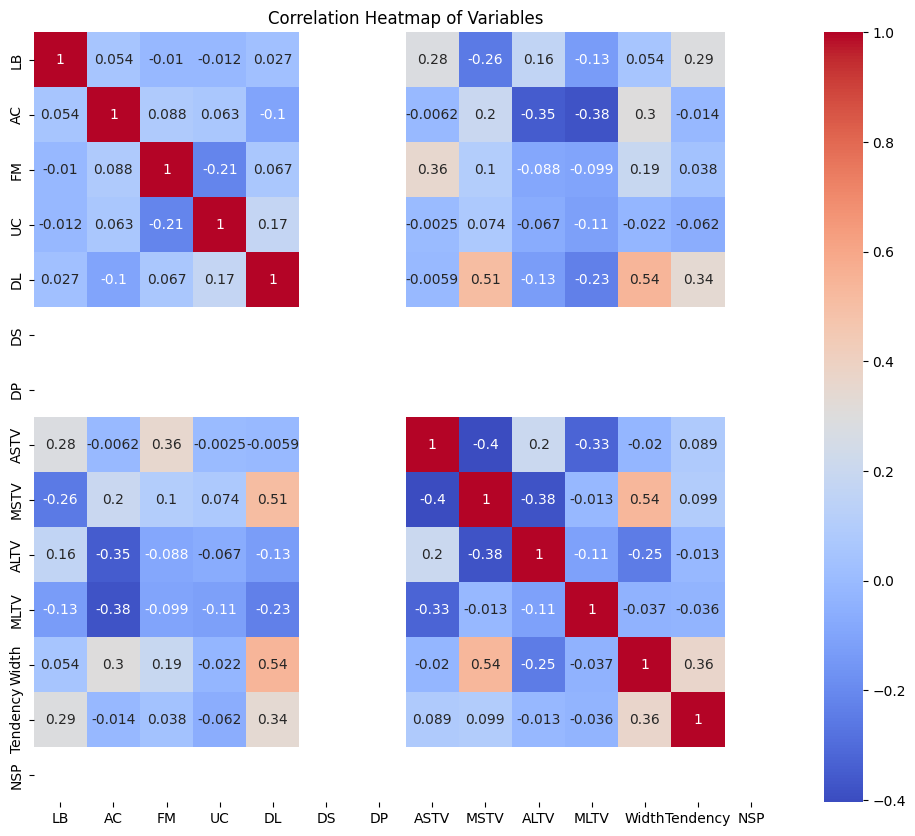

Strong correlations (>|0.6|):
LB and ASTV: correlation = 0.28
LB and MSTV: correlation = -0.26
LB and Tendency: correlation = 0.29
AC and ALTV: correlation = -0.35
AC and MLTV: correlation = -0.38
AC and Width: correlation = 0.30
FM and UC: correlation = -0.21
FM and ASTV: correlation = 0.36
UC and FM: correlation = -0.21
DL and MSTV: correlation = 0.51
DL and MLTV: correlation = -0.23
DL and Width: correlation = 0.54
DL and Tendency: correlation = 0.34
ASTV and LB: correlation = 0.28
ASTV and FM: correlation = 0.36
ASTV and MSTV: correlation = -0.40
ASTV and ALTV: correlation = 0.20
ASTV and MLTV: correlation = -0.33
MSTV and LB: correlation = -0.26
MSTV and DL: correlation = 0.51
MSTV and ASTV: correlation = -0.40
MSTV and ALTV: correlation = -0.38
MSTV and Width: correlation = 0.54
ALTV and AC: correlation = -0.35
ALTV and ASTV: correlation = 0.20
ALTV and MSTV: correlation = -0.38
ALTV and Width: correlation = -0.25
MLTV and AC: correlation = -0.38
MLTV and DL: correlation = -0.23


In [23]:
corr_matrix = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Variables')
plt.show()


threshold = 0.2
strong_corrs = [(i, j, corr_matrix.loc[i, j])
                for i in corr_matrix.columns
                for j in corr_matrix.index
                if i != j and abs(corr_matrix.loc[i, j]) >= threshold]

print("Strong correlations (>|0.6|):")
for var1, var2, corr in strong_corrs:
    print(f"{var1} and {var2}: correlation = {corr:.2f}")


In [24]:
"""
The dataset exhibits a mix of numerical variables with moderate variability and some skewed distributions
(variables like ALTV and Tendency have median zero but relatively high means).

Outlier detection and removal using the IQR method effectively reduced extreme values for numerical variables,
ensuring cleaner data for analysis.

Correlation analysis revealed mostly weak to moderate correlations among variables:

Some moderate positive correlations exist among variability-related variables (e.g., DL, Width, MSTV),
which could indicate physiological linkages in the context of the dataset.

Negative correlations between variables like MSTV and ASTV suggest opposing dynamics between these features.
"""


'\nThe dataset exhibits a mix of numerical variables with moderate variability and some skewed distributions \n(variables like ALTV and Tendency have median zero but relatively high means).\n\nOutlier detection and removal using the IQR method effectively reduced extreme values for numerical variables, \nensuring cleaner data for analysis.\n\nCorrelation analysis revealed mostly weak to moderate correlations among variables:\n\nSome moderate positive correlations exist among variability-related variables (e.g., DL, Width, MSTV), \nwhich could indicate physiological linkages in the context of the dataset.\n\nNegative correlations between variables like MSTV and ASTV suggest opposing dynamics between these features.\n'